# 1. Import the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load the Dataset

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho
...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,22/23,Ligue 1,21,2/1/23,A,Paris Saint-Germain,Montpellier HSC,1:3,SS,72,0:2,Left-footed shot,Fabián Ruiz
700,22/23,Ligue 1,22,2/4/23,H,Paris Saint-Germain,FC Toulouse,2:1,SS,58,2:1,Left-footed shot,Achraf Hakimi
701,22/23,Ligue 1,24,2/19/23,H,Paris Saint-Germain,LOSC Lille,4:3,CF,90+5,4:3,Direct free kick,\t
702,22/23,Ligue 1,25,2/26/23,A,Paris Saint-Germain,Olympique Marseille,0:3,CF,29,0:2,Right-footed shot,Kylian Mbappé


# 3. No. of Rows and No.of Columns in the Data

In [4]:
print('Number of Rows in the Dataset:',data.shape[0])
print('Number of Columns in the Dataset:',data.shape[1])

Number of Rows in the Dataset: 704
Number of Columns in the Dataset: 13


# 4. Checking The Datatype of the Columns

In [5]:
data.dtypes

Season              object
Competition         object
Matchday            object
Date                object
Venue               object
Club                object
Opponent            object
Result              object
Playing_Position    object
Minute              object
At_score            object
Type                object
Goal_assist         object
dtype: object

# 5. Check for the Missing Values

In [6]:
data.isnull().sum()

Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position      0
Minute                0
At_score              0
Type                  1
Goal_assist         214
dtype: int64

# 6. Filling up the Missing Values

In [7]:
data['Type'].value_counts()

Left-footed shot          436
Right-footed shot          86
Penalty                    84
Direct free kick           52
Header                     24
Tap-in                      9
Solo run                    4
Penalty rebound             3
Deflected shot on goal      2
Counter attack goal         1
Chest                       1
Long distance kick          1
Name: Type, dtype: int64

In [8]:
data['Type'].fillna('Left-footed shot',inplace=True)

In [9]:
data.isnull().sum()

Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position      0
Minute                0
At_score              0
Type                  0
Goal_assist         214
dtype: int64

In [10]:
data['Goal_assist'].fillna('Penalty',inplace=True)

In [11]:
data.isnull().sum()

Season              0
Competition         0
Matchday            0
Date                0
Venue               0
Club                0
Opponent            0
Result              0
Playing_Position    0
Minute              0
At_score            0
Type                0
Goal_assist         0
dtype: int64

# 7. Checking the unique Values in the columns

In [12]:
data['Club'].unique()

array(['FC Barcelona', 'Paris Saint-Germain'], dtype=object)

In [13]:
data['Playing_Position'].unique()

array(['CF', 'RW', 'LW', 'SS', 'CF ', 'AM', 'RW ', 'AM ', 'SS '],
      dtype=object)

In [14]:
data['Competition'].value_counts()

LaLiga                   474
UEFA Champions League    128
Copa del Rey              56
Ligue 1                   21
Supercopa                 14
FIFA Club World Cup        5
UEFA Super Cup             3
Trophée des Champions      1
Troph�e des Champions      1
Champions League           1
Name: Competition, dtype: int64

# 8. EDA on The Data

In [15]:
data['Competition'].unique()

array(['LaLiga', 'UEFA Champions League', 'Copa del Rey', 'Supercopa',
       'FIFA Club World Cup', 'UEFA Super Cup', 'Ligue 1',
       'Trophée des Champions', 'Troph�e des Champions',
       'Champions League'], dtype=object)

In [16]:
def leagues(x):
    if x in ['LaLiga','Copa del Rey', 'Supercopa']:
        return('Spanish Leagues')
    elif x in ['Ligue 1','Trophée des Champions','Troph�e des Champions']:
        return('French Leagues')
    else:
        return('UEFA Leagues')

In [17]:
data['Leagues'] = data['Competition'].apply(leagues)

In [18]:
data.drop('Competition',axis=1,inplace=True)

In [19]:
data

,Season,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,Leagues
0,04/05,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho,Spanish Leagues
1,05/06,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,Penalty,UEFA Leagues
2,05/06,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo,Spanish Leagues
3,05/06,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel,Spanish Leagues
4,05/06,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho,Spanish Leagues
...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,22/23,21,2/1/23,A,Paris Saint-Germain,Montpellier HSC,1:3,SS,72,0:2,Left-footed shot,Fabián Ruiz,French Leagues
700,22/23,22,2/4/23,H,Paris Saint-Germain,FC Toulouse,2:1,SS,58,2:1,Left-footed shot,Achraf Hakimi,French Leagues
701,22/23,24,2/19/23,H,Paris Saint-Germain,LOSC Lille,4:3,CF,90+5,4:3,Direct free kick,\t,French Leagues
702,22/23,25,2/26/23,A,Paris Saint-Germain,Olympique Marseille,0:3,CF,29,0:2,Right-footed shot,Kylian Mbappé,French Leagues


In [20]:
top10 = data["Opponent"].value_counts().sort_values(ascending=False).head(10)
top10

Sevilla FC                38
Atletico de Madrid        32
Valencia CF               31
Athletic Bilbao           29
Real Betis Balompie       26
Real Madrid               26
RCD Espanyol Barcelona    25
CA Osasuna                25
Levante UD                24
Getafe CF                 21
Name: Opponent, dtype: int64

In [21]:
top_10_min = data["Minute"].value_counts().sort_values(ascending=False).head(10)
top_10_min

55    14
87    13
86    13
78    13
75    12
45    12
90    12
80    12
58    11
42    11
Name: Minute, dtype: int64

In [22]:
data["Season"]=data["Season"].str.replace('11-Dec','11/12' )
data["Season"]=data["Season"].str.replace('Dec-13','12/13' )

In [23]:
top_10_sc = data["At_score"].value_counts().sort_values(ascending=False).head(10)
top_10_sc

1:00    98
2:00    81
0:01    70
0:02    57
3:00    49
1:01    48
2:01    37
1:02    29
4:00    29
3:01    27
Name: At_score, dtype: int64

## Grouping of Data for Visualization

In [25]:
col = data.groupby('Leagues')['Type'].value_counts()

In [26]:
co = data.groupby('Venue')['Type'].value_counts()

In [27]:
colm = data.groupby(top10)['Type'].value_counts()

In [61]:
position_stats = data.groupby(['Leagues', 'Playing_Position']).size().reset_index(name='Count')

## We have to change the result format as it is shown in the time format

In [28]:
data["Result"]=data["Result"].str.replace('4:00','4:0' )
data["Result"]=data["Result"].str.replace('3:00','3:0' )
data["Result"]=data["Result"].str.replace('5:00','5:0' )
data["Result"]=data["Result"].str.replace('3:01','3:1' )
data["Result"]=data["Result"].str.replace('4:01','4:1' )
data["Result"]=data["Result"].str.replace('0:02','0:2' )
data["Result"]=data["Result"].str.replace('5:01','5:1' )
data["Result"]=data["Result"].str.replace('1:02','1:2' )
data["Result"]=data["Result"].str.replace('2:02','2:2' )
data["Result"]=data["Result"].str.replace('0:04','0:4' )

## We have to change the scoreboard format as it is shown in the time format

In [29]:
data["At_score"]=data["At_score"].str.replace('1:00','1:0' )                 
data["At_score"]=data["At_score"].str.replace('2:00','2:0' )          
data["At_score"]=data["At_score"].str.replace('0:01','0:1' )            
data["At_score"]=data["At_score"].str.replace('0:02','0:2' )            
data["At_score"]=data["At_score"].str.replace('3:00','3:0' )      
data["At_score"]=data["At_score"].str.replace('1:01','1:1' )          
data["At_score"]=data["At_score"].str.replace('2:01','2:1' )       
data["At_score"]=data["At_score"].str.replace('1:02','1:2' )         
data["At_score"]=data["At_score"].str.replace('4:00','4:0' )          
data["At_score"]=data["At_score"].str.replace('3:01','3:1' )        

In [30]:
top_10_res = data["Result"].value_counts().sort_values(ascending=False).head(10)
top_10_res

4:0    47
3:0    43
5:0    42
3:1    38
4:1    35
0:2    35
5:1    32
1:2    30
2:2    29
0:4    27
Name: Result, dtype: int64

# 9. Data Visualization

In [31]:
data['Club'].value_counts(normalize=True)*100

FC Barcelona           95.454545
Paris Saint-Germain     4.545455
Name: Club, dtype: float64

In [32]:
counts = [95.45,4.55]

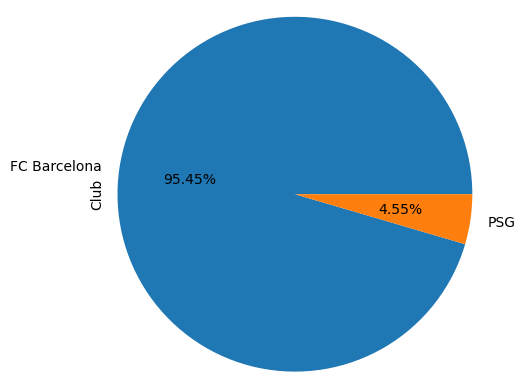

In [33]:
data['Club'].value_counts().plot(kind='pie',labels=['FC Barcelona', 'PSG'],x=counts,radius=1.2,autopct='%0.2f%%')
plt.show()

In [35]:
data['Leagues'].value_counts()

Spanish Leagues    544
UEFA Leagues       137
French Leagues      23
Name: Leagues, dtype: int64

In [36]:
data['Leagues'].value_counts(normalize=True)*100

Spanish Leagues    77.272727
UEFA Leagues       19.460227
French Leagues      3.267045
Name: Leagues, dtype: float64

In [37]:
counts = [77.27,19.46,3.26]

In [38]:
trop = ['Spanish Leagues','UEFA Leagues','French Leagues']

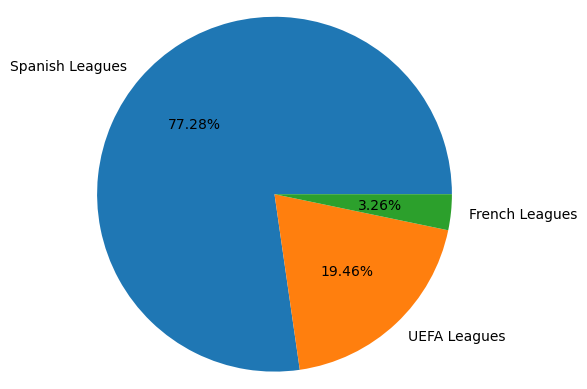

In [39]:
plt.pie(x=counts,labels=trop,radius=1.2,autopct='%0.2f%%')
plt.show()

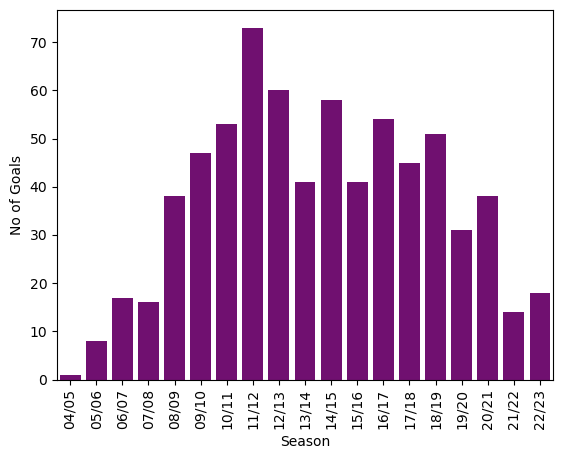

In [40]:
sns.countplot(data=data,x=data['Season'],color='purple')
plt.xlabel('Season')
plt.ylabel('No of Goals')
plt.xticks(rotation=90)
plt.show()

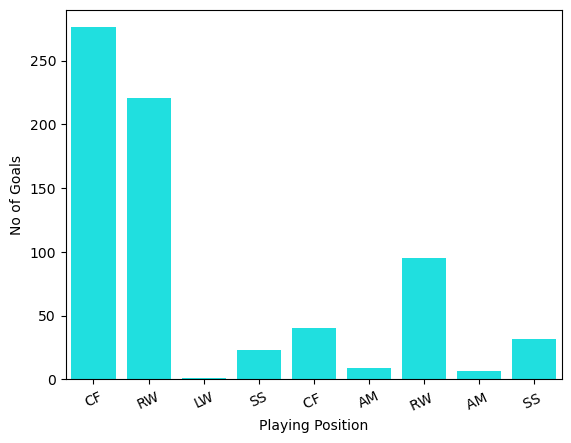

In [41]:
sns.countplot(data=data,x=data['Playing_Position'],color='Cyan')
plt.xlabel('Playing Position')
plt.ylabel('No of Goals')
plt.xticks(rotation=25)
plt.show()

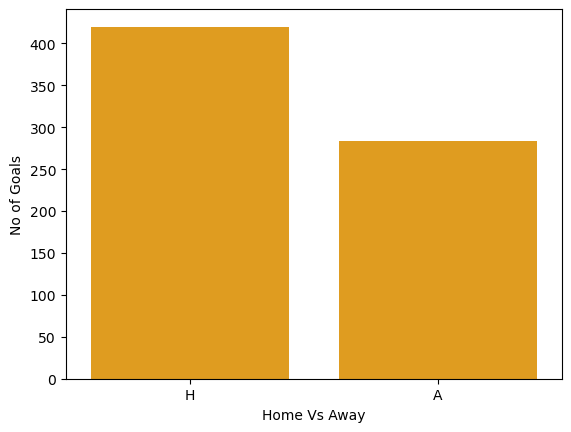

In [42]:
sns.countplot(data=data,x=data['Venue'],color='Orange')
plt.xlabel('Home Vs Away')
plt.ylabel('No of Goals')
plt.show()

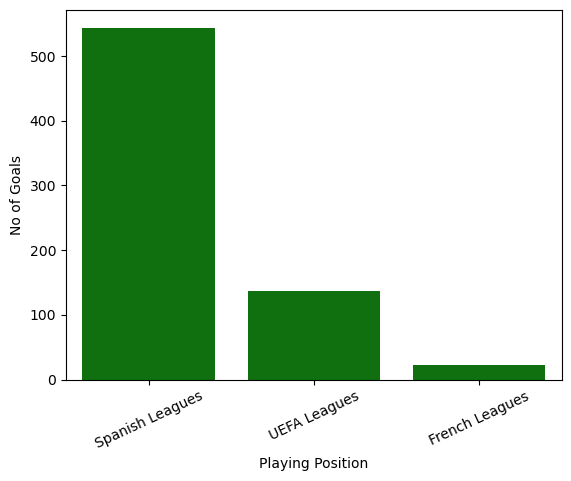

In [44]:
sns.countplot(data=data,x=data['Leagues'],color='green')
plt.xlabel('Playing Position')
plt.ylabel('No of Goals')
plt.xticks(rotation=25)
plt.show()

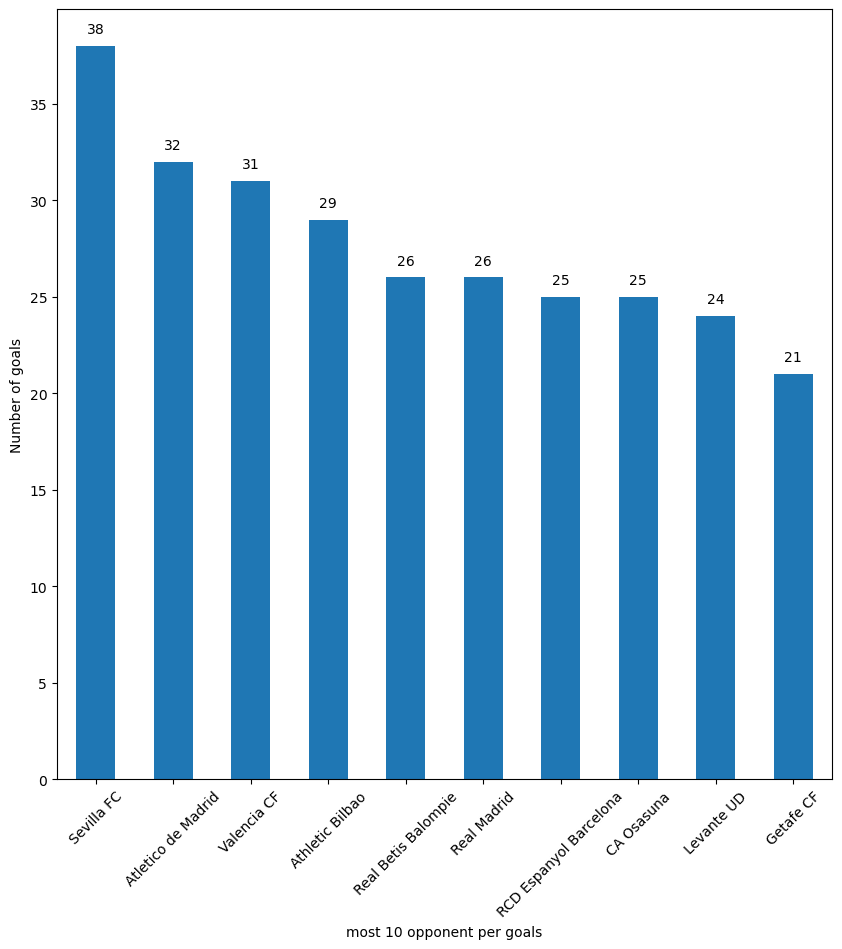

In [45]:
plt.figure(figsize=(10,10))
ax = plt.gca()
top10.plot(kind= 'bar')
plt.xlabel("most 10 opponent per goals")
plt.ylabel("Number of goals")
plt.xticks(rotation=45)
for i, v in enumerate(top10):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.show()

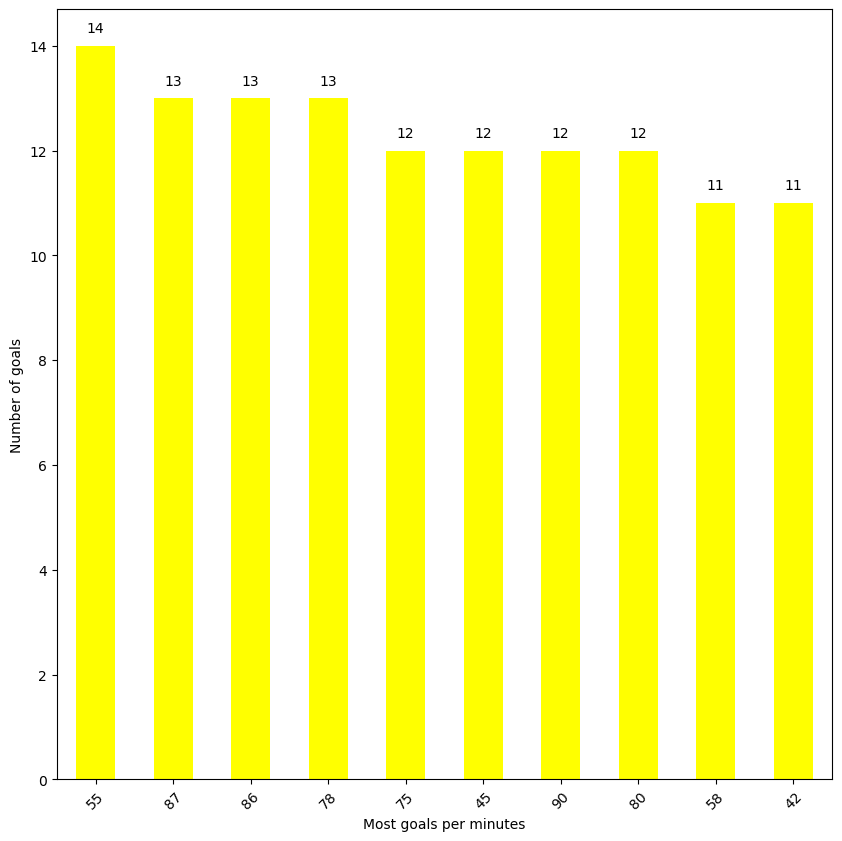

In [46]:
plt.figure(figsize=(10,10))
ax = plt.gca()
top_10_min.plot(kind= 'bar',color='yellow')
plt.xlabel("Most goals per minutes")
plt.ylabel("Number of goals")
plt.xticks(rotation=45)
for i, v in enumerate(top_10_min):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom')
plt.show()

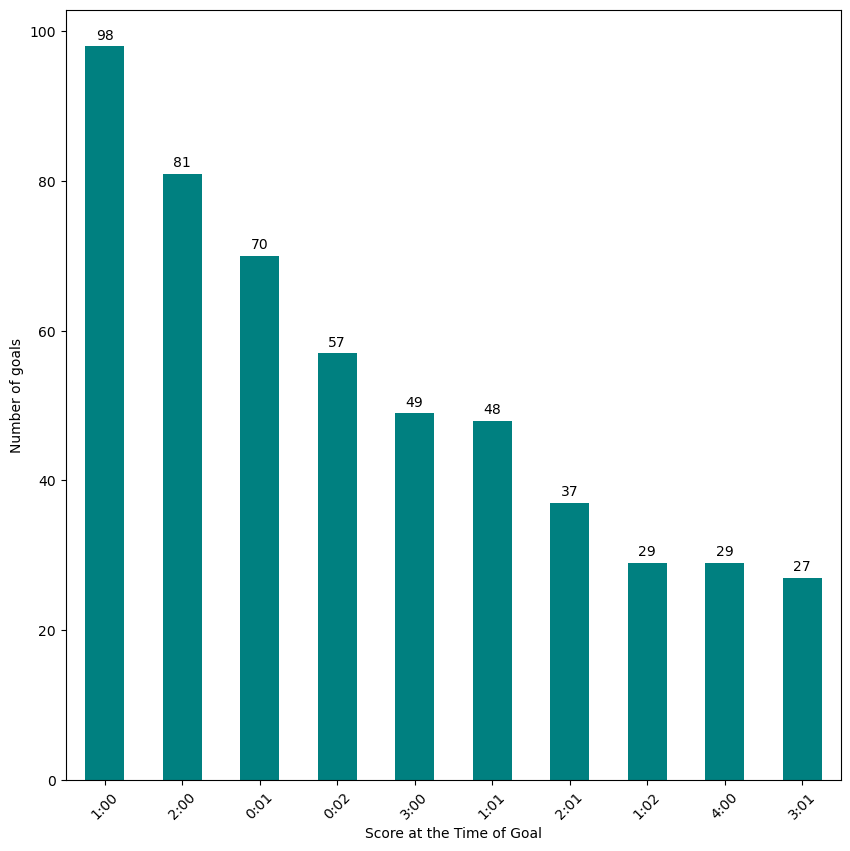

In [47]:
plt.figure(figsize=(10,10))
ax = plt.gca()
top_10_sc.plot(kind= 'bar',color='teal')
plt.xlabel("Score at the Time of Goal")
plt.ylabel("Number of goals")
plt.xticks(rotation=45)
for i, v in enumerate(top_10_sc):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.show()

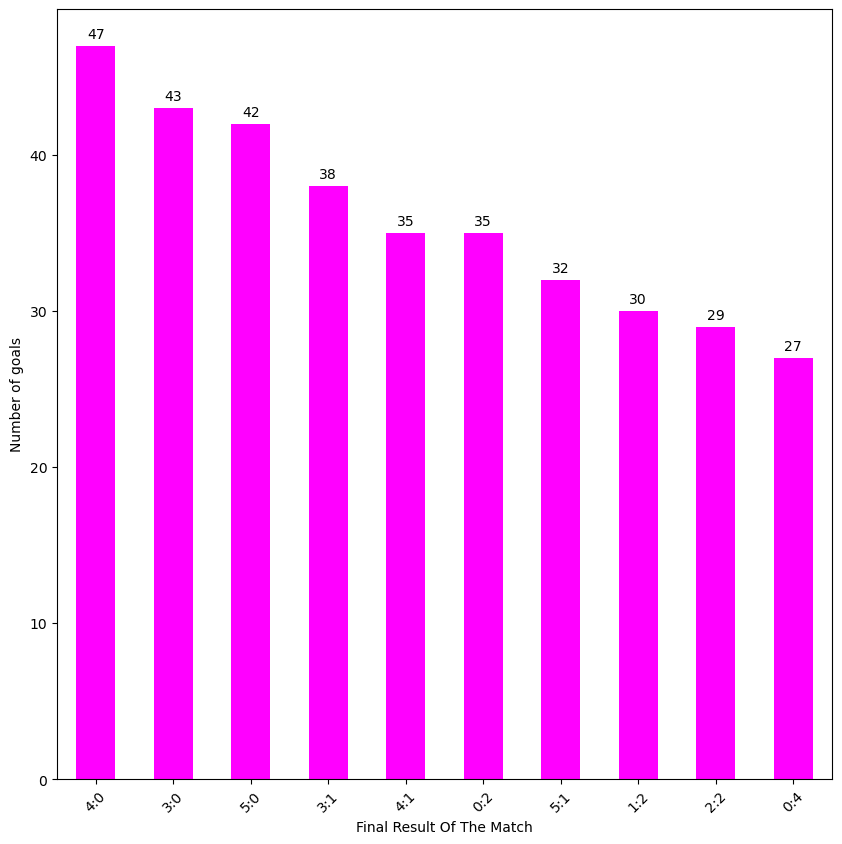

In [48]:
plt.figure(figsize=(10,10))
ax = plt.gca()
top_10_res.plot(kind= 'bar',color='magenta')
plt.xlabel("Final Result Of The Match")
plt.ylabel("Number of goals")
plt.xticks(rotation=45)
for i, v in enumerate(top_10_res):
    ax.text(i, v + 0.3, str(v), ha='center', va='bottom')
plt.show()

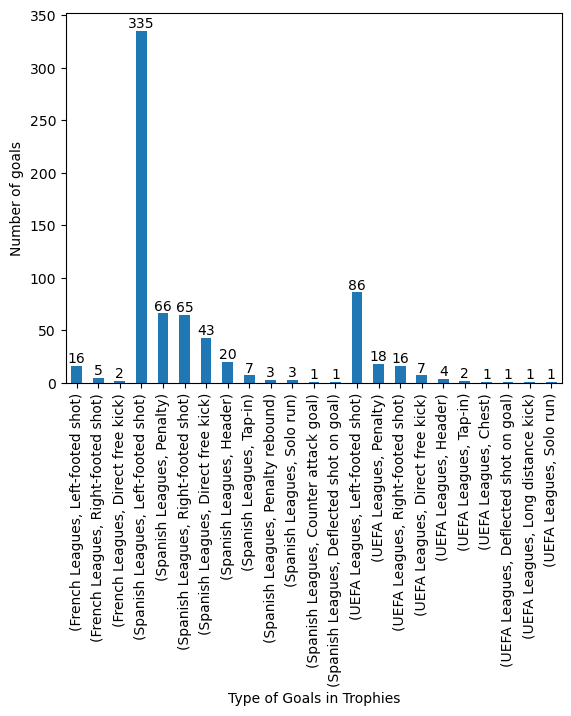

In [49]:
ax = plt.gca()
col.plot(kind='bar')
plt.xlabel("Type of Goals in Trophies")
plt.ylabel("Number of goals")
plt.xticks(rotation=90)
for i, v in enumerate(col):
    ax.text(i, v + 0.3, str(v), ha='center', va='bottom')
plt.show()

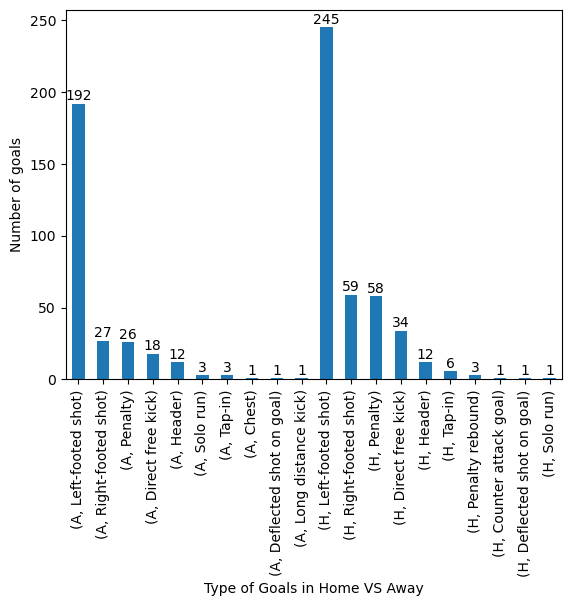

In [50]:
ax = plt.gca()
co.plot(kind='bar')
plt.xlabel("Type of Goals in Home VS Away")
plt.ylabel("Number of goals")
plt.xticks(rotation=90)
for i, v in enumerate(co):
    ax.text(i, v + 0.3, str(v), ha='center', va='bottom')
plt.show()

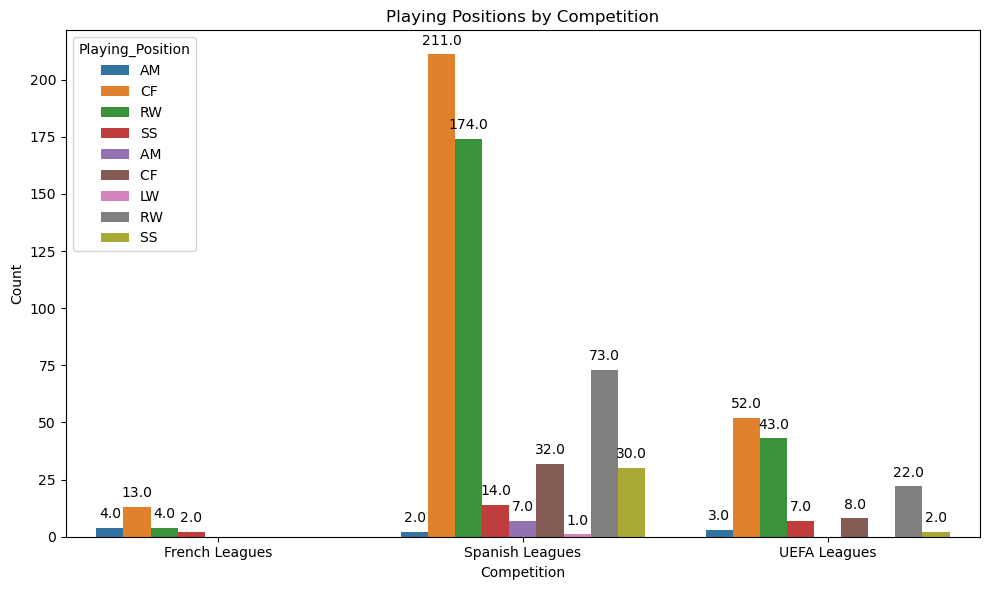

In [60]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Leagues',y='Count',hue='Playing_Position', data=position_stats)
plt.title('Playing Positions by Competition')
plt.xlabel('Competition')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()